# Twitter Sentiment Analysis

### Importing Packages and Libraries

In [1]:
import tweepy                          # for accessing the Twitter API
from textblob import TextBlob          # for processing textual data
from wordcloud import WordCloud        # for visual representation of textual data
import pandas as pd
import numpy as np
import re                              # for regular expression
import matplotlib.pyplot as plt

### Twitter Api Credentials

In [5]:
df = pd.read_csv(r'C:\Users\windows\Desktop\Projects\Twitter_Sentiment_Analysis\Twitter_Credentials.csv')

In [6]:
api_key = df.api_key[0]
api_key_secret = df.api_key_secret[0]
access_token = df.access_token[0]
access_token_secret = df.access_token_secret[0]

In [7]:
# Create the Authentication Object
auth = tweepy.OAuthHandler(api_key,api_key_secret)

# Set the access token and access token secret
auth.set_access_token(access_token,access_token_secret)

# Creating the Api object while passing authentication information in it
api = tweepy.API(auth)

### Extracting and Analyzing the Data

In [8]:
# Extract last 100 tweets from the Twitter user
posts = api.user_timeline(screen_name="BillGates", count=100, lang='en', tweet_mode="extended")

# Print the recent 5 tweets
print("Show the 5 recent tweets:\n")
for tweet in posts[:5]:
    print(tweet.full_text +'\n')


Show the 5 recent tweets:

The world did not do enough to prepare for a pandemic. We can avoid making the same mistake with climate change by:

1. Letting science and innovation lead the way
2. Making sure solutions work for poor countries too
3. Getting started now

https://t.co/p9m1j5QuJ7

Great tips from @CT_Bergstrom about how to find reliable sources of information and test claims you may see about the pandemic in your social media feeds. https://t.co/8RQUZAUICJ

RT @exemplarshealth: In our recent webinar, @doctorsoumya called for community-led responses to #coronavirus. These types of engagements ha…

If we learn the lessons of COVID-19, we can approach climate change more informed about the consequences of inaction, and more prepared to save lives and prevent the worst possible outcome. https://t.co/a1Ltv44UBY

In his final words, John Lewis challenges all of us to continue to stand up for what we truly believe. “Together, you can redeem the soul of our nation.” 

https://t.co/5

In [9]:
# Create a dataframe to store the tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])       # columns is for giving column name

# Print first 5 rows
df.head()

,Tweets
0,The world did not do enough to prepare for a p...
1,Great tips from @CT_Bergstrom about how to fin...
2,"RT @exemplarshealth: In our recent webinar, @d..."
3,"If we learn the lessons of COVID-19, we can ap..."
4,"In his final words, John Lewis challenges all ..."


**The tweets contain some special characetrs like @,hyperlinks etc.Hence it is necessary to clean the text first before moving ahead.**

### Data Cleaning 

In [10]:
#  Create a function to clean the tweets

def cleantxt(text):
    
    #stop_words = set(stopwords.words('english'))
    #word_tokens = word_tokenize(text)
    
    text = re.sub(r'@[A-Za-z0-9]+', '',text)
    text = re.sub(r'#', '',text)
    text = re.sub(r'RT[\s]+', '',text)
    text = re.sub(r'https?:\/\/\S+', '',text)
    
    return text

In [11]:
# Clean the tweets

df['Tweets'] = df['Tweets'].apply(cleantxt)

In [12]:
df

,Tweets
0,The world did not do enough to prepare for a p...
1,Great tips from _Bergstrom about how to find r...
2,": In our recent webinar, called for community..."
3,"If we learn the lessons of COVID-19, we can ap..."
4,"In his final words, John Lewis challenges all ..."
...,...
95,This is an incredible story about the power of...
96,The only way we'll achieve net-zero carbon emi...
97,"When we first started our foundation, Melinda ..."
98,"In our new annual letter, and I write about w..."


### Visualization

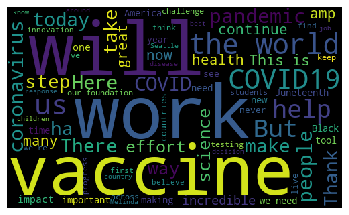

In [13]:
words = ''.join(df['Tweets'])
wordCloud = WordCloud(width=500, height=300, min_font_size=10, max_font_size=110).generate(words)

plt.imshow(wordCloud)
plt.axis("off")
plt.show()

### Subjectivity and Polarity

In [14]:
# Creating a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Creating a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [15]:
# Creating two new columns Subjectivity and Polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [16]:
df

,Tweets,Subjectivity,Polarity
0,The world did not do enough to prepare for a p...,0.528472,0.025000
1,Great tips from _Bergstrom about how to find r...,0.408333,0.416667
2,": In our recent webinar, called for community...",0.250000,0.000000
3,"If we learn the lessons of COVID-19, we can ap...",0.750000,0.000000
4,"In his final words, John Lewis challenges all ...",1.000000,0.000000
...,...,...,...
95,This is an incredible story about the power of...,0.500000,0.400000
96,The only way we'll achieve net-zero carbon emi...,1.000000,0.000000
97,"When we first started our foundation, Melinda ...",0.166667,0.125000
98,"In our new annual letter, and I write about w...",0.304293,0.128788


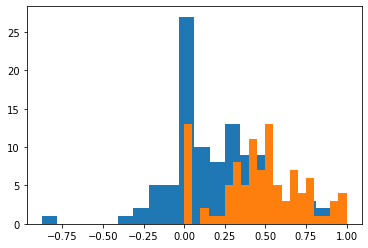

In [17]:
sub = df['Subjectivity']
pol = df['Polarity']
plt.hist(pol, bins=20)
plt.hist(sub, bins=20)
plt.show()

### Analysing the sentiment 

In [18]:
# Creating a function to find whether the tweet is Positive,Negative or Neutral
def getAnalysis(Polarity):
    if Polarity < 0:
        return 'Negative'
    elif Polarity > 0:
        return 'Positive'
    else:
        return 'Neutral'    

In [19]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [20]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,The world did not do enough to prepare for a p...,0.528472,0.025000,Positive
1,Great tips from _Bergstrom about how to find r...,0.408333,0.416667,Positive
2,": In our recent webinar, called for community...",0.250000,0.000000,Neutral
3,"If we learn the lessons of COVID-19, we can ap...",0.750000,0.000000,Neutral
4,"In his final words, John Lewis challenges all ...",1.000000,0.000000,Neutral
...,...,...,...,...
95,This is an incredible story about the power of...,0.500000,0.400000,Positive
96,The only way we'll achieve net-zero carbon emi...,1.000000,0.000000,Neutral
97,"When we first started our foundation, Melinda ...",0.166667,0.125000,Positive
98,"In our new annual letter, and I write about w...",0.304293,0.128788,Positive


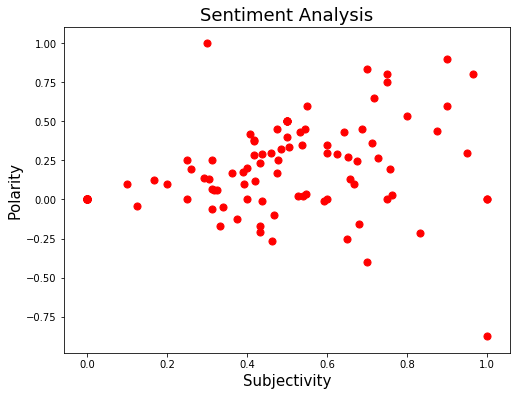

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(df['Subjectivity'],df['Polarity'], s=50, c='red', alpha=1)
plt.title("Sentiment Analysis",fontsize=18)
plt.xlabel("Subjectivity",fontsize=15)
plt.ylabel("Polarity",fontsize=15)
plt.show()

### Plotting the Value Counts

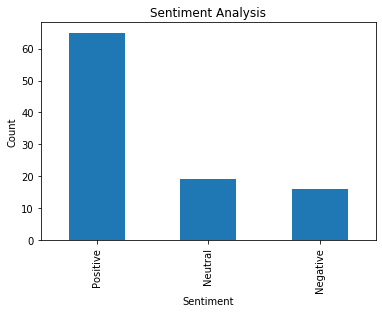

In [22]:
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Count")
df['Analysis'].value_counts().plot(kind='bar')
plt.show()